In [1]:
import numpy as np
import pylab as pl
import json
import os
import urllib2
from scipy.optimize import curve_fit, minimize
%pylab inline

from __future__ import print_function
__author__='djc'

url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


/Users/Daynan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#distributions = ['gaus', 'pois','binom','chisq','lap','wald']
mymean = 50
distributions = {}
means = {}

[1330  908  950 1121 1013 1584  669 1165 1132 1958   46  853 1130 1882  166
  411  566 1649  621  793  121  343 1620  427   84   39  133 1334 1338 1779
  892   93  277 1646 1112 1644  101 1668  329  576 1634 1376 1229 1494 1301
  834 1195 1272  555 1542 1298   43  304   74  482 1937  525 1550  623  927
 1435 1372 1428 1154 1362 1518 1035 1378 1318 1262  304  532  483  701  809
  159  181 1432 1015 1522 1770 1461 1638  463  314 1744 1960  409  619  775
   53 1157 1955 1032  141 1955 1580 1792 1819 1481]


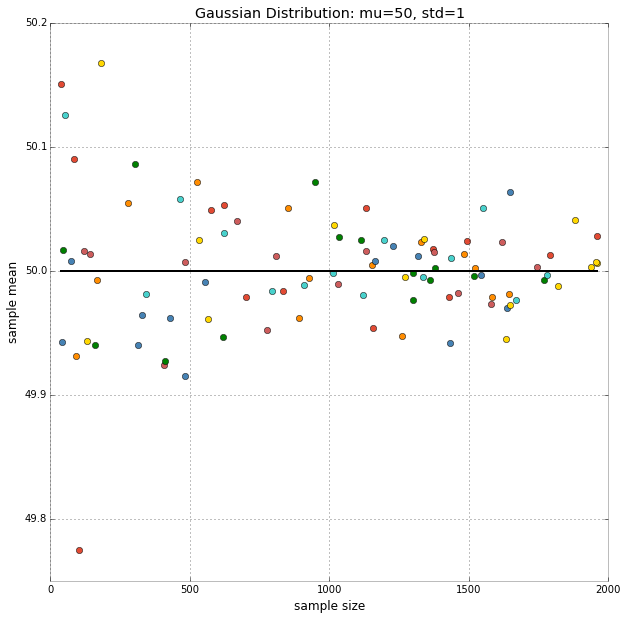

In [3]:
#create gaussian distribution
distributions['gaus'] = {}
gaus_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (gaus_size)
# We'll set the standard deviation arbitrarily.
gaus_std = 1
for n in gaus_size:
    #setting std to 1
    distributions['gaus'][n]=np.random.normal(mymean,gaus_std,size=n)

means['gaus'] = {}
    
#plot gaussian distribution
fig_gaus_mu_N = pl.figure(figsize=(10,10))
axgaus = fig_gaus_mu_N.add_subplot(111)
for nn in distributions['gaus']:
    means['gaus'][nn] = distributions['gaus'][nn].mean()
    axgaus.plot(nn, means['gaus'][nn], 'o')
    axgaus.set_title('Gaussian Distribution: mu={}, std={}'.format(mymean,gaus_std))
    axgaus.set_xlabel('sample size')
    axgaus.set_ylabel('sample mean')
    axgaus.plot([min(gaus_size), max(gaus_size)],[mymean,mymean],'k')

[1624  541  418 1265 1630  970  255  631 1720 1566 1509 1136  262  381  569
 1087 1723   40  860 1517 1114  547 1993 1329  684  681  691  944 1983 1424
 1898  648  894 1291 1202  696 1608  458 1332  744 1958 1640  944  311 1550
 1505  702 1194 1606 1686 1653 1462  477  436  465  929 1307  761 1780 1771
  204  877 1601  440 1177   76   73 1029  805 1838 1494   53  366  479 1151
 1882  876  396  307  155   12 1767 1675  748  374  710  676 1003 1366  551
  114 1547 1966  446 1028 1982  890 1524  634 1535]


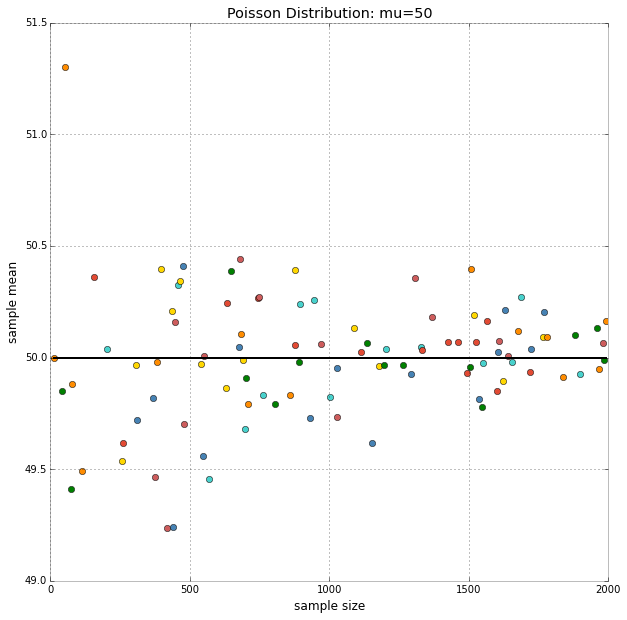

In [4]:
#create poisson distribution
distributions['pois'] = {}
pois_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (pois_size)
for n in pois_size:
    #lamba = mymean
    distributions['pois'][n]=np.random.poisson(mymean,size=n)

means['pois'] = {}
    
#plot poisson distribution
fig_pois_mu_N = pl.figure(figsize=(10,10))
axpois = fig_pois_mu_N.add_subplot(111)
for nn in distributions['pois']:
    means['pois'][nn] = distributions['pois'][nn].mean()
    axpois.plot(nn, means['pois'][nn], 'o')
    axpois.set_title('Poisson Distribution: mu={}'.format(mymean))
    axpois.set_xlabel('sample size')
    axpois.set_ylabel('sample mean')
    axpois.plot([min(pois_size), max(pois_size)],[mymean,mymean],'k')

[ 660  360 1686 1221 1488 1297 1252  856  845 1555 1211  706  159  709 1265
 1830 1729  602  258 1981 1625 1420  468 1431 1663  733  867  879  885  954
   61 1644  197 1883 1615 1671  286  890  265  225  476  252 1187 1945 1998
  662 1989 1035 1224 1971 1120 1423 1515   72  686  590 1939 1406  231 1987
 1200 1112  997  769 1716 1382 1705  132  906  158 1604  597  433  370   32
 1227 1837 1376  655  783 1553  501  513 1967  294 1777  590 1545  622 1904
 1102 1046 1732  617  711 1271 1621  877 1671  883]


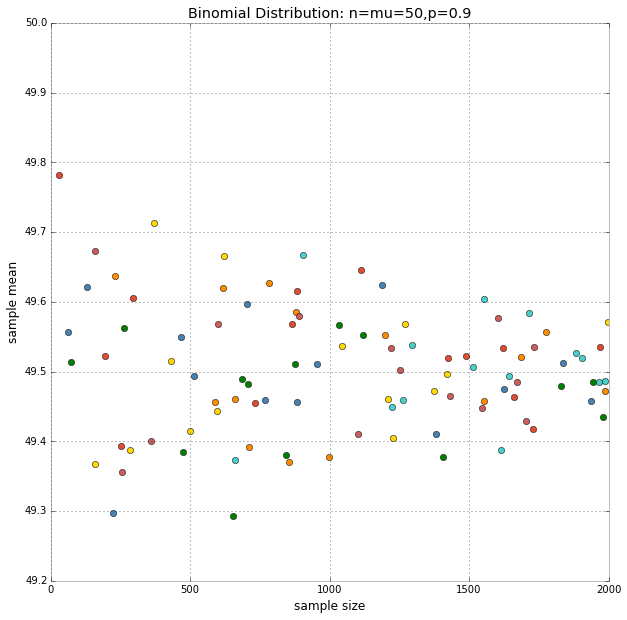

In [11]:
#create binomial distribution
distributions['binom'] = {}
binom_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (binom_size)
# binomial disributions describe dichotomous outcomes (i.e. pass/fail) 
# for a given number of trials. 
# To simulate such an outcome I'm giving a probability of success an arbitrary value
p=.90
# and since we know that np=mean, we can use the mean and p to find n
for n in binom_size:
    distributions['binom'][n]=np.random.binomial(mymean/p,p,size=n)

means['binom'] = {}

#plot binomial distribution
fig_binom_mu_N = pl.figure(figsize=(10,10))
axbinom = fig_binom_mu_N.add_subplot(111)
for nn in distributions['binom']:
    means['binom'][nn] = distributions['binom'][nn].mean()
    axbinom.plot(nn, means['binom'][nn], 'o')
    axbinom.set_title('Binomial Distribution: n=mu={},p={}'.format(mymean,p))
    axbinom.set_xlabel('sample size')
    axbinom.set_ylabel('sample mean')
    axbinom.plot([min(binom_size), max(binom_size)],[mymean,mymean],'k')

[ 384  222 1554   76 1094 1303 1354  545  979 1239 1973  277   87 1452  406
  951  778  668  831  154 1585  255  955 1202   84  819 1205 1834 1483  922
  634 1276 1392  827 1951  390  551 1763 1613 1365 1866 1890  494 1746  574
   60 1915 1251 1596 1608  406  383 1166 1501 1889 1808  716  988 1980 1730
   46 1547 1296  117  926  332  115  625 1967  115  354 1441 1235  511  252
 1626 1198 1012  287  167 1722 1704  239  259 1124 1957 1205 1889 1619 1167
 1466 1714  288  429  433 1297 1219 1370 1917 1925]


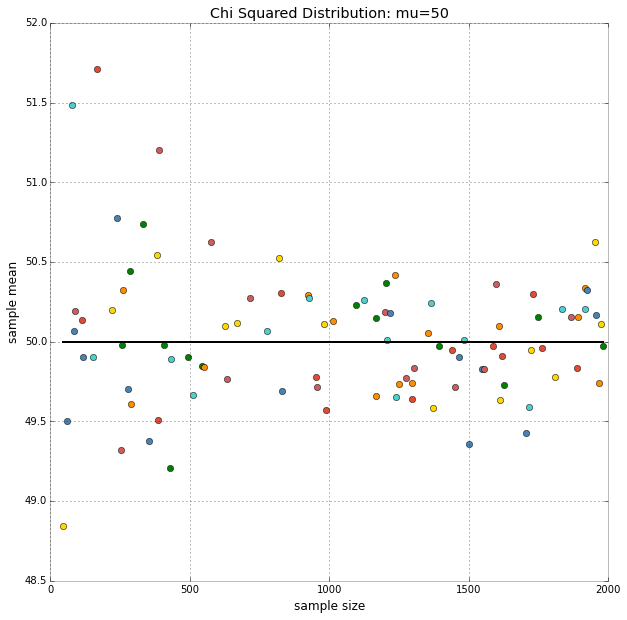

In [6]:
#create chi^2 distribution
distributions['chisq'] = {}

chisq_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (chisq_size)
# df is equal to mean
df = mymean
for n in chisq_size:
    distributions['chisq'][n]=np.random.chisquare(mymean,size=n)

means['chisq'] = {}

#plot chi^2 distribution
fig_chisq_mu_N = pl.figure(figsize=(10,10))
axchisq = fig_chisq_mu_N.add_subplot(111)
for nn in distributions['chisq']:
    means['chisq'][nn] = distributions['chisq'][nn].mean()
    axchisq.plot(nn, means['chisq'][nn], 'o')
    axchisq.set_title('Chi Squared Distribution: mu={}'.format(mymean))
    axchisq.set_xlabel('sample size')
    axchisq.set_ylabel('sample mean')
    axchisq.plot([min(chisq_size), max(chisq_size)],[df,df],'k')

[1870  852 1214 1067 1181 1454  460  551  557 1313 1354  602  570 1300  582
  925 1369 1715  178  239 1204  400 1199 1355 1077 1048 1428  438  283 1010
  660 1425 1925  170  148  849  342  881  101 1537 1815  417  175 1488  541
 1448 1051  569  201  460  704  440  753 1007 1889  669 1347  463  874  986
 1523  167 1367   19 1471 1539  899  592  656  446 1495 1315  260 1655  776
  940 1828  260  653 1920  659  256 1139 1449  509  712  746  751 1697  491
 1491  713  815  383 1979  310 1385   34 1558 1646]


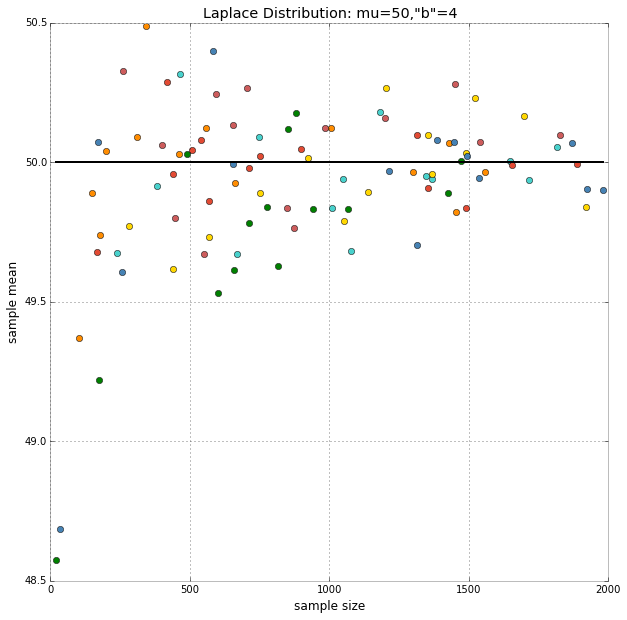

In [7]:
#create laplace distribution
distributions['lap'] = {}

lap_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes

print (lap_size)
# the "float" or "b" scale parameter should be >0 (real). We'll set it arbitrarily:
b = 4

for n in lap_size:
    distributions['lap'][n]=np.random.laplace(mymean,b,size=n)

means['lap'] = {}

#plot laplace distribution
fig_lap_mu_N = pl.figure(figsize=(10,10))
axlap = fig_lap_mu_N.add_subplot(111)
for nn in distributions['lap']:
    means['lap'][nn] = distributions['lap'][nn].mean()
    axlap.plot(nn, means['lap'][nn], 'o')
    axlap.set_title('Laplace Distribution: mu={},"b"={}'.format(mymean,b))
    axlap.set_xlabel('sample size')
    axlap.set_ylabel('sample mean')
    axlap.plot([min(lap_size), max(lap_size)],[mymean,mymean],'k')

[1340 1743  481 1903 1775  638 1151 1464  239 1262 1019  139 1238 1577  428
 1448  499 1351  526  332 1207 1566 1533  241  741 1340  529  259 1020  128
 1323 1985  755 1912 1694  154 1651  627 1938 1599 1561 1031  877  510 1270
  358  974  903  467 1714  613 1979  408 1034  486  758 1965  331 1971 1556
 1332 1263 1765   46 1671  528  520  219 1721  268 1006 1499 1218  520 1132
  593   21  476   54 1262  165 1133 1151 1311 1314  427 1058  723  471 1720
  518 1490  517 1723 1847  163  826 1101 1090 1068]


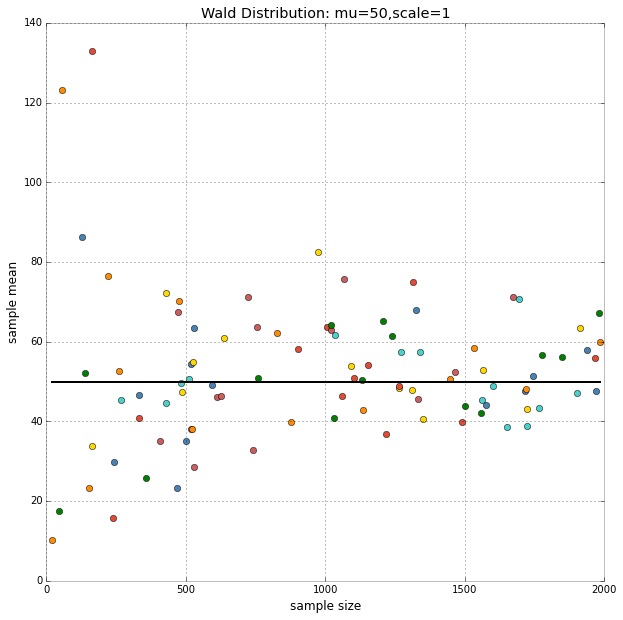

In [8]:
#create Wald, or "inverse Gaussian" distribution
distributions['wald'] = {}

wald_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (wald_size)
# the scale parameter should be >=0 (real). We'll set it arbitrarily:
wald_scale = 1

for n in wald_size:
    distributions['wald'][n]=np.random.wald(mymean,wald_scale,size=n)

means['wald'] = {}

#plot wald distribution
fig_wald_mu_N = pl.figure(figsize=(10,10))
axwald = fig_wald_mu_N.add_subplot(111)
for nn in distributions['wald']:
    means['wald'][nn] = distributions['wald'][nn].mean()
    axwald.plot(nn, means['wald'][nn], 'o')
    axwald.set_title('Wald Distribution: mu={},scale={}'.format(mymean,wald_scale))
    axwald.set_xlabel('sample size')
    axwald.set_ylabel('sample mean')
    axwald.plot([min(wald_size), max(wald_size)],[mymean,mymean],'k')

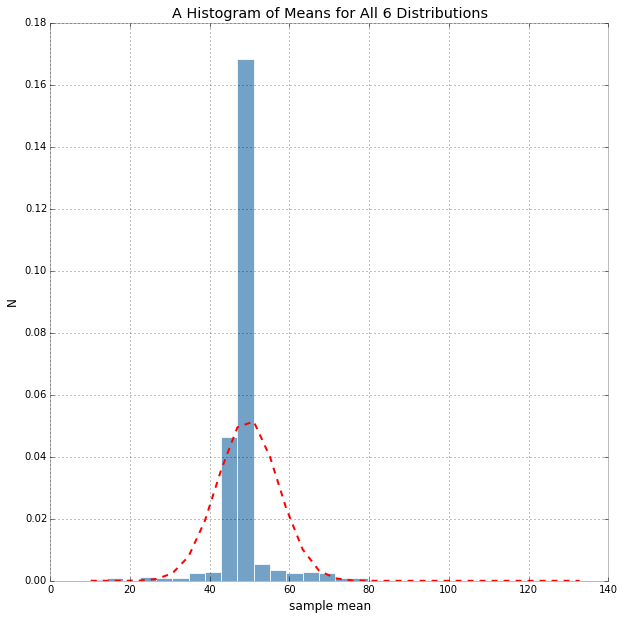

In [9]:
from scipy.stats import norm
from numpy import linspace
allmeans=[]
for n in distributions:
    for nn in means[n]:
        allmeans.append(means[n][nn])

# best fit of data
(mu, sigma) = norm.fit(allmeans)

fig_allmeans = pl.figure(figsize=(10,10))
axmeans = fig_allmeans.add_subplot(111)
n, bins, patches = axmeans.hist(allmeans,bins=30, normed=1, alpha=.75)
axmeans.set_title("A Histogram of Means for All 6 Distributions")
pl.xlabel('sample mean')
pl.ylabel('N')

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
axmeans.plot(bins, y, 'r--', linewidth=2)